# Library

In [1]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.ticker import PercentFormatter

from feature_engine.datetime import DatetimeFeatures

# Data Preparation

In [2]:
# load properties data
properties = pd.read_csv("properties.csv", index_col = [0])

# data shape
print(properties.shape)

# see the data
properties.head()

(267, 9)


,﻿id,building,date_sale,type,property#,area,price,status,customerid
0,1030,1,11/1/2005,Apartment,30,743.09,"$246,172.68",Sold,C0028
1,1029,1,10/1/2005,Apartment,29,756.21,"$246,331.90",Sold,C0027
2,2002,2,7/1/2007,Apartment,2,587.28,"$209,280.91",Sold,C0112
3,2031,2,12/1/2007,Apartment,31,1604.75,"$452,667.01",Sold,C0160
4,1049,1,11/1/2004,Apartment,49,1375.45,"$467,083.31",Sold,C0014


In [3]:
# rename incorrect column names
properties.rename(columns={"property#" : "property"}, inplace=True)
properties.rename(columns={"﻿id" : "id"}, inplace=True)

In [4]:
# remove extra whitespace in column customerid properties dataset
properties["customerid"] = properties["customerid"].str.strip()

In [5]:
# load customers data
customer = pd.read_csv("customers.csv", index_col=[0])

# data shape
print(customer.shape)

# see data
customer.head()

(162, 12)


,﻿customerid,entity,name,surname,birth_date,sex,country,state,purpose,deal_satisfaction,mortgage,source
0,C0110,Individual,Kareem,Liu,5/11/1968,F,USA,California,Home,4,Yes,Website
1,C0010,Individual,Trystan,Oconnor,11/26/1962,M,USA,California,Home,1,No,Website
2,C0132,Individual,Kale,Gay,4/7/1959,M,USA,California,Home,4,Yes,Agency
3,C0137,Individual,Russell,Gross,11/25/1959,M,USA,California,Home,5,No,Website
4,C0174,Company,Marleez,Co,NaN,NaN,USA,California,Investment,5,No,Website


In [6]:
# rename customerid in customer data
customer.rename(columns={"﻿customerid" : "customerid"}, inplace=True)

In [7]:
# merge the two dataset
# using left join

data = properties.merge(customer, how="left", on="customerid")

In [8]:
# data shape
print(data.shape)

# see data
data.head()

(267, 20)


,id,building,date_sale,type,property,area,price,status,customerid,entity,name,surname,birth_date,sex,country,state,purpose,deal_satisfaction,mortgage,source
0,1030,1,11/1/2005,Apartment,30,743.09,"$246,172.68",Sold,C0028,Individual,Madalyn,Mercer,6/21/1986,F,USA,California,Home,5.0,No,Website
1,1029,1,10/1/2005,Apartment,29,756.21,"$246,331.90",Sold,C0027,Individual,Lara,Carrillo,2/24/1983,F,USA,California,Home,5.0,No,Website
2,2002,2,7/1/2007,Apartment,2,587.28,"$209,280.91",Sold,C0112,Individual,Donavan,Flowers,12/27/1985,M,USA,California,Home,1.0,Yes,Client
3,2031,2,12/1/2007,Apartment,31,1604.75,"$452,667.01",Sold,C0160,Individual,Darien,Dorsey,12/27/1985,M,USA,California,Investment,3.0,Yes,Website
4,1049,1,11/1/2004,Apartment,49,1375.45,"$467,083.31",Sold,C0014,Individual,Alessandra,Perry,5/15/1979,F,USA,California,Home,4.0,No,Agency


In [9]:
# basic information about dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 267 entries, 0 to 266
Data columns (total 20 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 267 non-null    int64  
 1   building           267 non-null    int64  
 2   date_sale          267 non-null    object 
 3   type               267 non-null    object 
 4   property           267 non-null    int64  
 5   area               267 non-null    float64
 6   price              267 non-null    object 
 7   status             267 non-null    object 
 8   customerid         195 non-null    object 
 9   entity             195 non-null    object 
 10  name               195 non-null    object 
 11  surname            195 non-null    object 
 12  birth_date         178 non-null    object 
 13  sex                178 non-null    object 
 14  country            195 non-null    object 
 15  state              181 non-null    object 
 16  purpose            195 non

## Data Types Checking

In [10]:
# see each columns data types
data.dtypes

id                     int64
building               int64
date_sale             object
type                  object
property               int64
area                 float64
price                 object
status                object
customerid            object
entity                object
name                  object
surname               object
birth_date            object
sex                   object
country               object
state                 object
purpose               object
deal_satisfaction    float64
mortgage              object
source                object
dtype: object

Not all columns has correct data types. `date_sale` and `birth_date` supposed to be datetime data type, and `price` suppose to be numerical.

In [11]:
# check value of date columns

print("date_sale unique : \n")
print(data["date_sale"].unique())

print("birth_date unique : \n")
print(data["birth_date"].unique())

date_sale unique : 

['11/1/2005' '10/1/2005' '7/1/2007' '12/1/2007' '11/1/2004' '9/1/2007'
 '1/1/2008' '6/1/2006' '3/1/2006' '10/1/2004' '8/1/2006' '10/1/2007'
 '11/1/2006' '4/1/2007' '10/1/2006' '12/1/2006' '3/1/2005' '3/1/2007'
 '9/1/2006' '1/1/2007' '5/1/2007' '7/1/2006' '5/1/2008' '11/1/2007'
 '1/1/2005' '8/1/2007' '6/1/2005' '2/1/2007' '6/1/2007' '2/1/2005'
 '8/1/2004' '12/1/2008' '5/1/2010' '4/1/2006' '8/1/2005' '6/1/2004'
 '12/1/2005' '3/1/2004' '2/1/2006' '4/1/2005' '5/1/2006' '#NUM!'
 '9/1/2005' '7/1/2005']
birth_date unique : 

['6/21/1986' '2/24/1983' '12/27/1985' '5/15/1979' '12/26/1981' '5/27/1982'
 '6/27/1979' '12/3/1979' '8/17/1976' '9/14/1980' '6/4/1978' '6/10/1977'
 '12/3/1978' '9/14/1978' '12/25/1977' '12/25/1976' '1/8/1977' '3/22/1975'
 '10/5/1975' '2/26/1976' '9/1/1973' '3/27/1974' '8/12/1975' '3/26/1972'
 '9/15/1973' '12/25/1974' '7/18/1974' '2/10/1974' '5/5/1970' '7/11/1972'
 '6/7/1973' '12/15/1973' '8/18/1973' '12/2/1971' '7/17/1973' '5/7/1972'
 '10/30/1969' '5/

one value is incorrect format at `date_sale`. we need to change it. in this case, we convert the value to NaN

In [12]:
# check
data[data["date_sale"] == "#NUM!"]

,id,building,date_sale,type,property,area,price,status,customerid,entity,name,surname,birth_date,sex,country,state,purpose,deal_satisfaction,mortgage,source
178,5052,5,#NUM!,Apartment,52,1769.48,"$532,877.38",-,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
196,1002,1,#NUM!,Apartment,2,1238.58,"$400,865.92",-,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
197,1003,1,#NUM!,Office,3,713.71,"$217,787.71",-,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
198,1008,1,#NUM!,Apartment,8,763.21,"$219,630.90",-,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
199,1019,1,#NUM!,Apartment,19,798.50,"$244,624.87",-,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
262,5044,5,#NUM!,Apartment,44,1238.58,"$322,610.74",-,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
263,5047,5,#NUM!,Apartment,47,794.52,"$279,191.26",-,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
264,5048,5,#NUM!,Apartment,48,1013.27,"$287,996.53",-,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
265,5050,5,#NUM!,Apartment,50,1074.71,"$365,868.78",-,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [13]:
# replace incorrect format to NaN
data["date_sale"] = data["date_sale"].replace({"#NUM!" : np.nan})

In [14]:
# recheck
data["date_sale"].unique()

array(['11/1/2005', '10/1/2005', '7/1/2007', '12/1/2007', '11/1/2004',
       '9/1/2007', '1/1/2008', '6/1/2006', '3/1/2006', '10/1/2004',
       '8/1/2006', '10/1/2007', '11/1/2006', '4/1/2007', '10/1/2006',
       '12/1/2006', '3/1/2005', '3/1/2007', '9/1/2006', '1/1/2007',
       '5/1/2007', '7/1/2006', '5/1/2008', '11/1/2007', '1/1/2005',
       '8/1/2007', '6/1/2005', '2/1/2007', '6/1/2007', '2/1/2005',
       '8/1/2004', '12/1/2008', '5/1/2010', '4/1/2006', '8/1/2005',
       '6/1/2004', '12/1/2005', '3/1/2004', '2/1/2006', '4/1/2005',
       '5/1/2006', nan, '9/1/2005', '7/1/2005'], dtype=object)

In [15]:
# convert to datetime datatype
data["date_sale"] = pd.to_datetime(data["date_sale"])
data["birth_date"] = pd.to_datetime(data["birth_date"])

In [16]:
# remove dollar sign
# change , with .
data["price"] = data["price"].str.replace(",", "").str[1:]

# convert data type
data["price"] = pd.to_numeric(data["price"])

In [17]:
# check
data["price"]

0      246172.68
1      246331.90
2      209280.91
3      452667.01
4      467083.31
         ...    
262    322610.74
263    279191.26
264    287996.53
265    365868.78
266    199216.40
Name: price, Length: 267, dtype: float64

## Cardinality

In [18]:
# get categorical variables
vars_cat = [col for col in data.columns if data[col].dtypes == "O"]

In [19]:
# check cardinality
for var in vars_cat:
    print(f"number of unique values {var} : {data[var].nunique()}")

number of unique values type : 2
number of unique values status : 2
number of unique values customerid : 162
number of unique values entity : 2
number of unique values name : 159
number of unique values surname : 156
number of unique values sex : 2
number of unique values country : 9
number of unique values state : 9
number of unique values purpose : 2
number of unique values mortgage : 2
number of unique values source : 3


In [20]:
# check unique values 
# var has less than ten unique

for var in [col for col in vars_cat if data[col].nunique() <10]:
    print(f"unique values {var}")
    print(data[var].unique())
    print()

unique values type
['Apartment' 'Office']

unique values status
[' Sold ' '-']

unique values entity
['Individual' nan 'Company']

unique values sex
['F' 'M' nan]

unique values country
['USA' 'UK' 'USA ' 'Belgium' 'Russia' 'Denmark' 'Germany' 'Mexico'
 'Canada' nan]

unique values state
['California' 'Virginia' 'Arizona' 'Oregon' 'Nevada' 'Colorado' 'Utah' nan
 'Kansas' 'Wyoming']

unique values purpose
['Home' 'Investment' nan]

unique values mortgage
['No' 'Yes' nan]

unique values source
['Website' 'Client' 'Agency' nan]



In [21]:
# remove extra whitespace in status and country

data["status"] = data["status"].str.strip()
data["country"] = data["country"].str.strip()

## Missing Value

In [22]:
# check proportion of NaN
data.isna().mean()

id                   0.000000
building             0.000000
date_sale            0.269663
type                 0.000000
property             0.000000
area                 0.000000
price                0.000000
status               0.000000
customerid           0.269663
entity               0.269663
name                 0.269663
surname              0.269663
birth_date           0.333333
sex                  0.333333
country              0.269663
state                0.322097
purpose              0.269663
deal_satisfaction    0.269663
mortgage             0.269663
source               0.269663
dtype: float64

In [23]:
# recheck data types
data.dtypes

id                            int64
building                      int64
date_sale            datetime64[ns]
type                         object
property                      int64
area                        float64
price                       float64
status                       object
customerid                   object
entity                       object
name                         object
surname                      object
birth_date           datetime64[ns]
sex                          object
country                      object
state                        object
purpose                      object
deal_satisfaction           float64
mortgage                     object
source                       object
dtype: object

# Data Analysis

In [24]:
# numerical descriptive
data.describe()

,id,building,date_sale,property,area,price,birth_date,deal_satisfaction
count,267.000000,267.000000,195,267.000000,267.000000,267.000000,178,195.000000
mean,2975.142322,2.947566,2006-11-08 14:38:46.153846272,27.580524,936.221311,281171.901386,1961-01-08 11:35:43.820224704,3.600000
min,1002.000000,1.000000,2004-03-01 00:00:00,1.000000,410.710000,117564.070000,1931-02-13 00:00:00,1.000000
25%,2015.500000,2.000000,2006-04-16 00:00:00,14.500000,756.210000,217553.055000,1951-05-04 06:00:00,3.000000
50%,3024.000000,3.000000,2007-03-01 00:00:00,28.000000,798.280000,249075.660000,1962-09-23 00:00:00,4.000000
75%,4031.500000,4.000000,2007-09-01 00:00:00,40.000000,1121.950000,326964.855000,1970-07-09 06:00:00,5.000000
max,5052.000000,5.000000,2010-05-01 00:00:00,59.000000,1942.500000,538271.740000,1986-06-21 00:00:00,5.000000
std,1392.197474,1.391794,NaN,15.361437,284.894858,89119.121005,NaN,1.340872


In [25]:
# categorical descriptive
data.describe(include="O")

,type,status,customerid,entity,name,surname,sex,country,state,purpose,mortgage,source
count,267,267,195,195,195,195,178,195,181,195,195,195
unique,2,2,162,2,159,156,2,8,9,2,2,3
top,Apartment,Sold,C0174,Individual,Marleez,Co,M,USA,California,Home,No,Website
freq,259,195,9,178,9,17,108,177,120,119,133,119


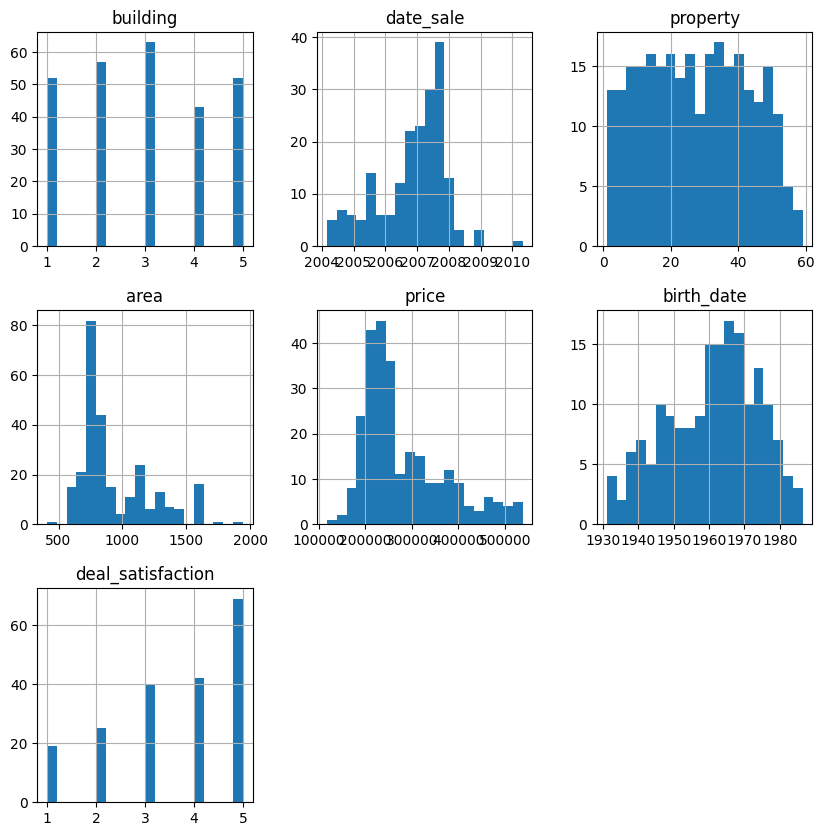

In [26]:
# numerical variables
vars_num = [col for col in data.describe().columns if col != "id"]

# distribution of numerical values
data[vars_num].hist(figsize = (10, 10), bins = 20)
plt.show()

## Sales Performance by Building and Type

In [27]:
# get data sold only
df_sold = data[data["status"] == "Sold"]

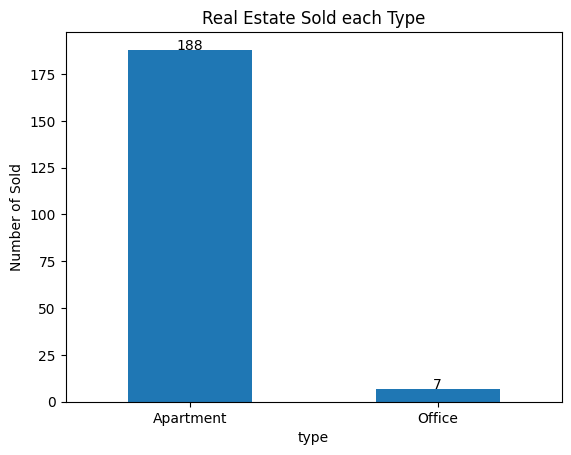

In [28]:
plt.title("Real Estate Sold each Type")

ax = df_sold["type"].value_counts().plot(kind="bar")
ax.set_xticklabels(ax.get_xticklabels(), rotation=0, ha='center')
for p in ax.patches:
    ax.annotate(
        p.get_height(), 
        (p.get_x() + p.get_width()/2., p.get_height()),
        ha="center"
    )

plt.savefig("./assets/Real Estate Sold each Type.png")
plt.ylabel("Number of Sold")
plt.show()

- Almost all residences sold are apartment types. This indicates that apartments are much more popular than offices.

In [29]:
# proportion of building
df_sold["building"].value_counts()

building
2    54
3    53
1    46
4    23
5    19
Name: count, dtype: int64

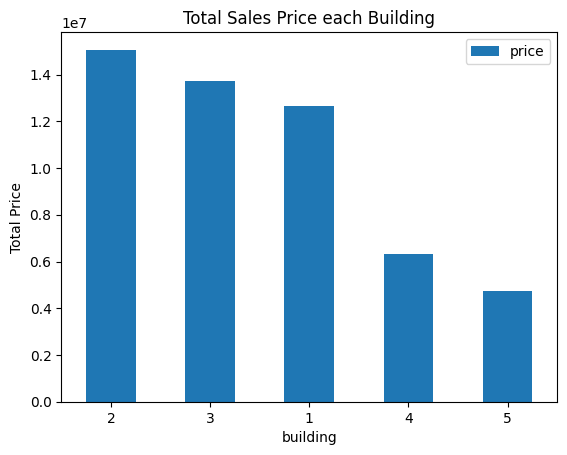

In [30]:
# total price for each building

df_temp = df_sold.groupby(by="building")[["price"]].sum().sort_values(by="price", ascending=False)

ax = df_temp.plot(kind="bar")
ax.set_xticklabels(ax.get_xticklabels(), rotation=0)
plt.title("Total Sales Price each Building")
plt.ylabel("Total Price")
plt.savefig("./assets/Total Sales Price each Building.png")
plt.show()

- Total sales of type 2 buildings are the highest. The lowest is building type 5. Building types 2, 3, and 1 have a total sales price that is not too far compared to buildings types 4 and 5.

In [31]:
# total price each type in each building
df_sold.groupby(
    by=["type", "building"]
)[["price"]].sum().sort_values("price", ascending=False)

price
type      building             
Apartment 2         15064176.13
          3         13739779.13
          1         10887579.98
          4          6318607.24
          5          4757103.37
Office    1          1772493.53

In [32]:
# create pivot table for stacked bar visualization
df_ = pd.pivot_table(
    df_sold, 
    index="type", 
    columns="building", 
    values="price", 
    aggfunc="sum"
)

# get percentage for each type 
df_ = df_.div(df_.sum(axis=1), axis=0) * 100

df_

building,1,2,3,4,5
type,,,,,
Apartment,21.446072,29.673022,27.064259,12.446228,9.370418
Office,100.000000,NaN,NaN,NaN,NaN


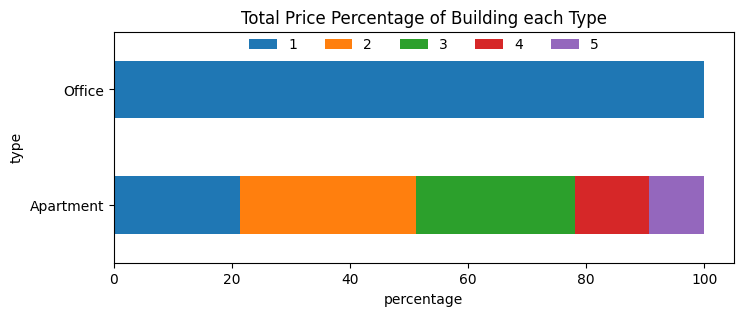

In [33]:
# visualize
df_.plot(kind="barh", stacked=True, figsize=(8, 3))

plt.title("Total Price Percentage of Building each Type")
plt.xlabel("percentage")

# add legend
plt.legend(
    bbox_to_anchor=(0.5, 0.89),
    loc="lower center",
    borderaxespad=0,
    frameon=False,
    ncol=5
)

plt.savefig("./assets/total price percentage.png", bbox_inches='tight')
plt.show()

- All office type residences sold are type 1 buildings. This means the building type with the total sales price is in 3rd place. For apartment-type residences, the highest total sales prices were for buildings of types 2, 3, 1, 4 and 5. Total sales of type 2 buildings accounted for 29% of the total sales.

## Sales Performance by Country and State

In [34]:
# see how many country and state in number

display(df_sold["country"].value_counts())
display(df_sold["state"].value_counts())

country
USA        177
Canada       7
Russia       4
UK           2
Belgium      2
Denmark      1
Germany      1
Mexico       1
Name: count, dtype: int64

state
California    120
Nevada         17
Arizona        11
Oregon         11
Colorado       11
Utah            5
Virginia        4
Kansas          1
Wyoming         1
Name: count, dtype: int64

In [35]:
# spread of state in country

df_sold.groupby(by=["country", "state"]).size().unstack()

state,Arizona,California,Colorado,Kansas,Nevada,Oregon,Utah,Virginia,Wyoming
country,,,,,,,,,
Belgium,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Germany,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
UK,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
USA,9.0,118.0,11.0,1.0,17.0,11.0,5.0,4.0,1.0


In [36]:
# total price each country
df_temp = df_sold.groupby(
    by="country",
)[["price"]].sum().sort_values(by="price", ascending=False)

# get cummulative percent
df_temp["percent"] = df_temp["price"].cumsum()*100/df_temp["price"].sum()

df_temp

,price,percent
country,,
USA,47807039.18,90.992151
Canada,1918485.69,94.643646
Russia,1115315.34,96.766449
Belgium,458150.94,97.638458
UK,440285.36,98.476462
Mexico,338181.18,99.120129
Denmark,257183.48,99.609632
Germany,205098.21,100.000000


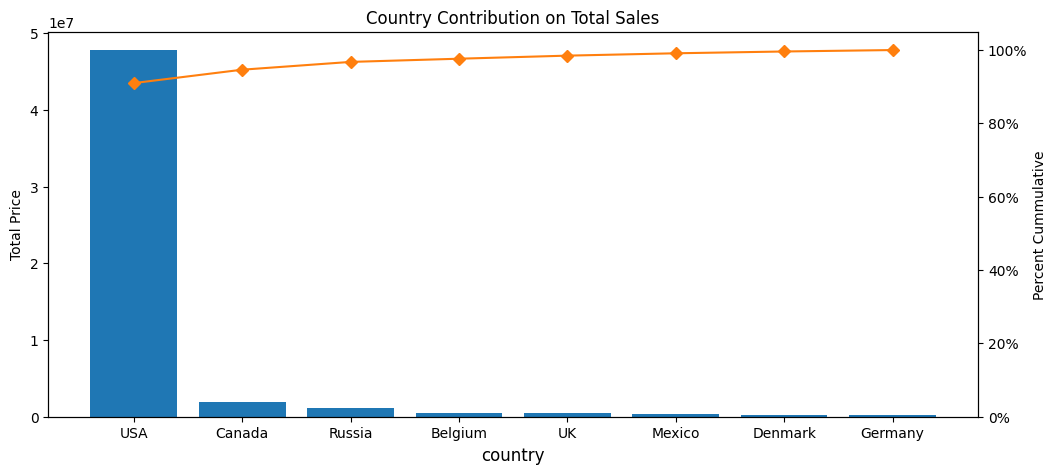

In [37]:
fig, ax = plt.subplots(figsize=[12, 5])

plt.title("Country Contribution on Total Sales")

# chart for y left axis
ax.bar(df_temp.index, df_temp["price"])

# add y right axis
ax2 = ax.twinx()

# chart for y right axis
ax2.plot(df_temp.index, df_temp["percent"], color="C1", marker="D")

# percentage axis
ax2.yaxis.set_major_formatter(PercentFormatter())

ax.set_xlabel("country", fontsize=12)
ax.set_ylabel("Total Price")
ax2.set_ylabel("Percent Cummulative")
ax2.set_ylim([0, 105])

plt.savefig("./assets/country contribution.png", bbox_inches="tight")

plt.show()

- The country with the highest total sales price is the USA. This country accounts for 90% of the total sales price overall. Sales in the USA, Canada and Russia have reached more than 95% of total sales overall.

## Breakdown by Building

In [38]:
data.groupby(by = "building")[["area", "price", "deal_satisfaction"]].mean()

,area,price,deal_satisfaction
building,,,
1,928.038846,275143.242500,3.630435
2,943.891930,286661.848246,3.518519
3,927.852381,280451.255556,3.566038
4,974.720930,290239.515581,3.869565
5,914.298654,274557.604615,3.526316


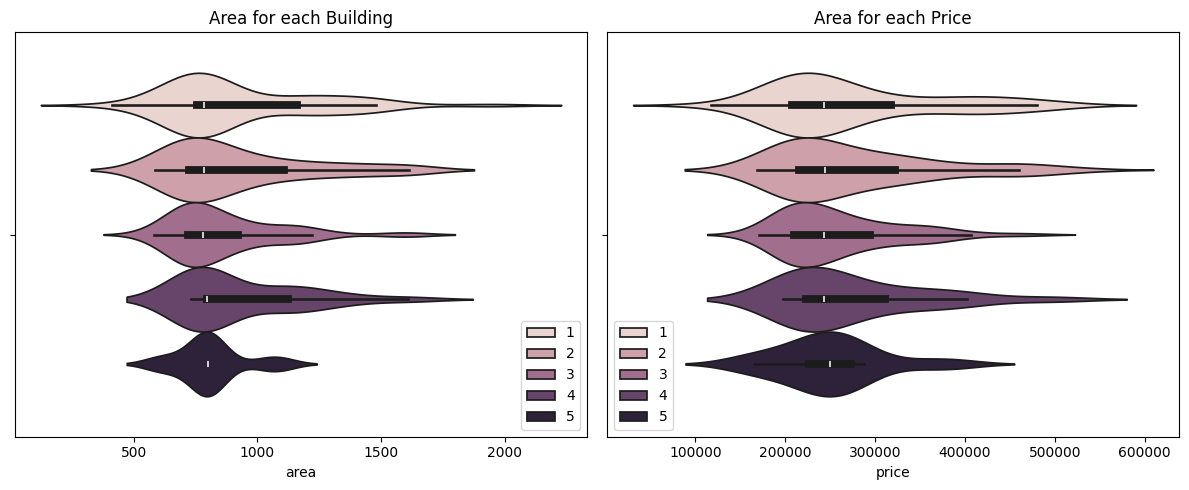

In [39]:
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.title("Area for each Building")
sns.violinplot(data=df_sold, x="area", hue="building")
plt.legend(loc="lower right")

plt.subplot(1, 2, 2)
plt.title("Area for each Price")
sns.violinplot(data=df_sold, x="price", hue="building")
plt.legend(loc="lower left")

plt.tight_layout()
plt.savefig("./assets/by building.png", bbox_inches="tight")
plt.show()

## By Age

In [40]:
# get age data
data["age"] = (data["date_sale"] - data["birth_date"]).dt.days//365

# binning age data
lower_limit = [19, 25, 31, 36, 42, 48, 54, 59, 65, 71, 76]
age_bin = ["19-25", "25-31", "31-36", "36-42", "42-48", "48-54", "54-59", "59-65", "65-71", "71-76"]

# get bin age
data["age_bin"] = pd.cut(data["age"], bins = lower_limit, labels=age_bin, include_lowest=True)

# see data
data[["age", "age_bin"]].head()

,age,age_bin
0,19.0,19-25
1,22.0,19-25
2,21.0,19-25
3,21.0,19-25
4,25.0,19-25


In [41]:
# redefine df_sold
df_sold = data[data["status"] == "Sold"]

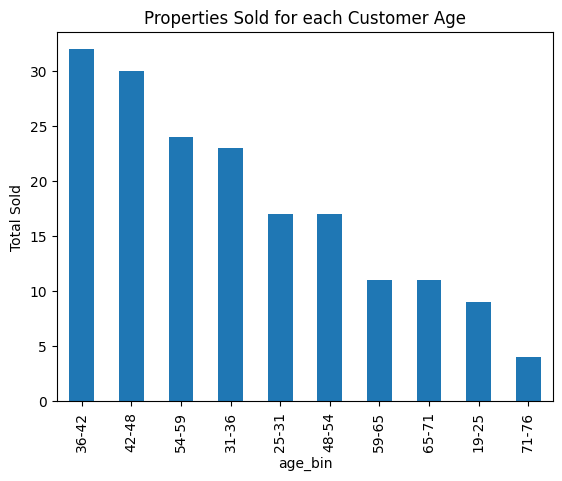

In [42]:
plt.title("Properties Sold for each Customer Age")
df_sold["age_bin"].value_counts().plot(kind="bar")
plt.ylabel("Total Sold")

plt.savefig("./assets/properties sold customer age.png", bbox_inches="tight")
plt.show()

In [43]:
df_ = df_sold.groupby(by=["age_bin", "purpose"], observed=True).size().unstack()

# get percentage for each type 
df_ = df_.div(df_.sum(axis=1), axis=0) * 100

df_

purpose,Home,Investment
age_bin,,
19-25,66.666667,33.333333
25-31,82.352941,17.647059
31-36,73.913043,26.086957
36-42,65.625000,34.375000
42-48,73.333333,26.666667
48-54,76.470588,23.529412
54-59,50.000000,50.000000
59-65,63.636364,36.363636
65-71,36.363636,63.636364


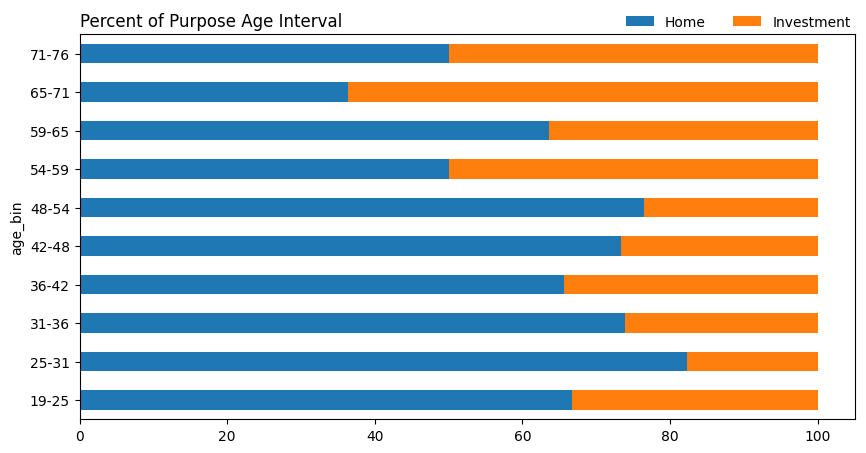

In [44]:
df_.plot(kind="barh", stacked=True, figsize=(10, 5))

plt.title("Percent of Purpose Age Interval", loc="left")
# add legend
plt.legend(
    bbox_to_anchor=(0.85, 1.0),
    loc="lower center",
    borderaxespad=0,
    frameon=False,
    ncol=2
)

plt.savefig("./assets/percent purpose.png", bbox_inches="tight")
plt.show()

- The customers who buy the most houses are aged 36-42 years, followed by those aged 42-48 years. 65% of customers who buy at the age of 36-42 years are for residence.

- Almost all age ranges of customers buy houses to use as a place to live, except for the age range 65-71 years. At that age, 63% of homes sold are for investment.

## Deal Satisfaction

In [45]:
# deal satisfaction by country

df = data.groupby(by = "country")[["deal_satisfaction"]].mean().sort_values(by = "deal_satisfaction", ascending = False)
df

,deal_satisfaction
country,
Canada,5.000000
Germany,5.000000
UK,4.000000
USA,3.581921
Belgium,3.000000
Mexico,3.000000
Russia,2.500000
Denmark,1.000000


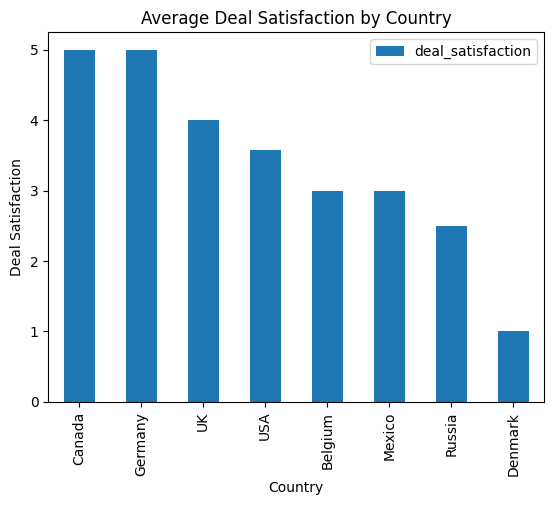

In [46]:
# visualization

df.plot(kind = "bar")
plt.title("Average Deal Satisfaction by Country")
plt.ylabel("Deal Satisfaction")
plt.xlabel("Country")
plt.savefig("./assets/average deal satisfaction.png")
plt.show()

## Revenue Over Time

In [47]:
# check min date and max date
print(data["date_sale"].min(), data["date_sale"].max())

2004-03-01 00:00:00 2010-05-01 00:00:00


In [48]:
# get columns date_sale and price only
df_time = data[["date_sale", "price"]]
df_time = df_time.set_index("date_sale")

# groupby sum of price
df_time = df_time.resample("ME").sum()
df_time.head(10)

,price
date_sale,
2004-03-31,697655.03
2004-04-30,0.00
2004-05-31,0.00
2004-06-30,606778.27
2004-07-31,0.00
2004-08-31,620437.99
2004-09-30,0.00
2004-10-31,1214785.83
2004-11-30,1257352.68


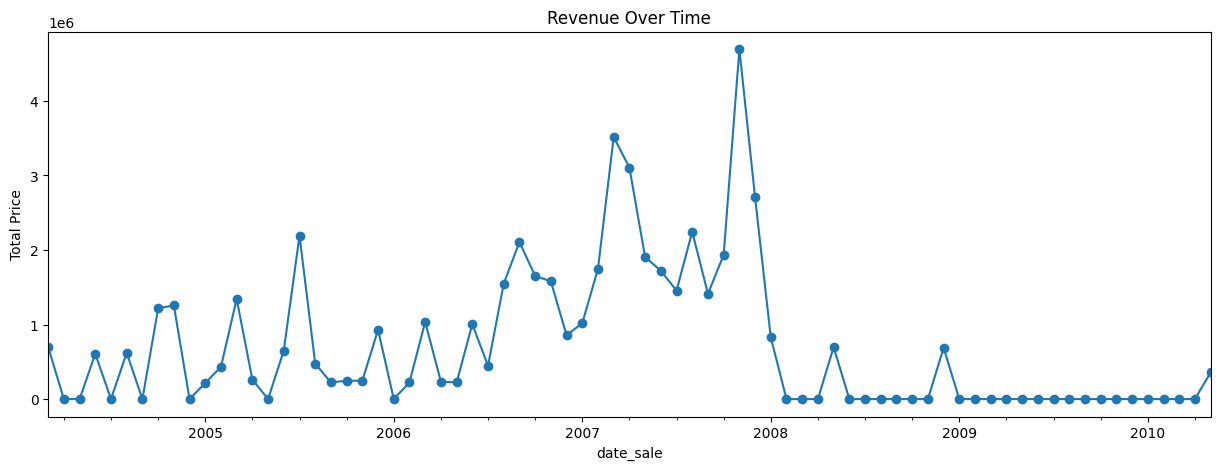

In [49]:
plt.title("Revenue Over Time")
df_time["price"].plot(kind="line", figsize=(15, 5), marker="o")
plt.ylabel("Total Price")

plt.savefig("./assets/revenue over time.png", bbox_inches="tight")
plt.show()

- In the period March 2004 to January 2008, residential sales performance based on price experienced ups and downs. However, overall sales performance could be said to have increased until it peaked in November 2007. After that, sales performance somehow dropped and there were no transactions for several months. In fact, during 2009 there were no sales at all.

In [50]:
# extract date
extractor = DatetimeFeatures(variables="index", missing_values="ignore")
df_time = extractor.fit_transform(df_time)

# see data
df_time.head()

,price,month,year,day_of_week,day_of_month,hour,minute,second
date_sale,,,,,,,,
2004-03-31,697655.03,3,2004,2,31,0,0,0
2004-04-30,0.00,4,2004,4,30,0,0,0
2004-05-31,0.00,5,2004,0,31,0,0,0
2004-06-30,606778.27,6,2004,2,30,0,0,0
2004-07-31,0.00,7,2004,5,31,0,0,0


In [51]:
# melted
df_ = df_time.melt(id_vars=["month", "year"], value_vars="price")
df_.head()

,month,year,variable,value
0,3,2004,price,697655.03
1,4,2004,price,0.00
2,5,2004,price,0.00
3,6,2004,price,606778.27
4,7,2004,price,0.00


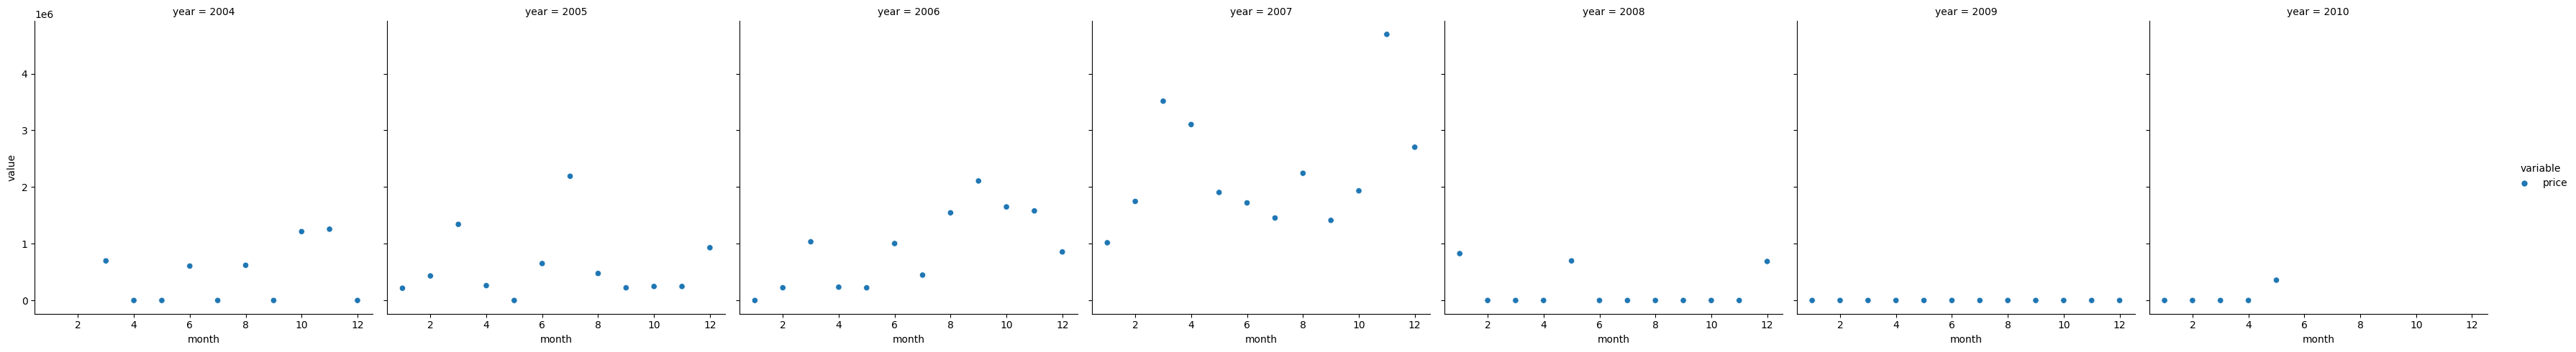

In [52]:
# visualize
sns.relplot(data = df_, x="month", y="value", hue="variable", col="year")
plt.show()